In [193]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

# Data Analysis

First, we import the libraries and the data

In [194]:
df = pd.read_csv("2014/results.csv")

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31984 non-null  object 
 1   name       31984 non-null  object 
 2   division   31984 non-null  int64  
 3   25k        31984 non-null  object 
 4   gender     31984 non-null  object 
 5   age        31984 non-null  int64  
 6   official   31984 non-null  float64
 7   bib        31984 non-null  object 
 8   genderdiv  31984 non-null  int64  
 9   ctz        1244 non-null   object 
 10  35k        31984 non-null  object 
 11  overall    31984 non-null  int64  
 12  pace       31984 non-null  float64
 13  state      29408 non-null  object 
 14  30k        31984 non-null  object 
 15  5k         31984 non-null  object 
 16  half       31984 non-null  object 
 17  20k        31984 non-null  object 
 18  country    31984 non-null  object 
 19  city       31983 non-null  object 
 20  40k   

In [196]:
df = df.reindex(sorted(df.columns), axis=1)

In [197]:
df=df.drop(columns=["ctz"])

Column ctz has too many null values, it is better to drop it.

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31984 non-null  object 
 1   20k        31984 non-null  object 
 2   25k        31984 non-null  object 
 3   30k        31984 non-null  object 
 4   35k        31984 non-null  object 
 5   40k        31984 non-null  object 
 6   5k         31984 non-null  object 
 7   age        31984 non-null  int64  
 8   bib        31984 non-null  object 
 9   city       31983 non-null  object 
 10  country    31984 non-null  object 
 11  division   31984 non-null  int64  
 12  gender     31984 non-null  object 
 13  genderdiv  31984 non-null  int64  
 14  half       31984 non-null  object 
 15  name       31984 non-null  object 
 16  official   31984 non-null  float64
 17  overall    31984 non-null  int64  
 18  pace       31984 non-null  float64
 19  state      29408 non-null  object 
dtypes: flo

In [199]:
df = df.dropna()

There are not many entries with null state, therefore it is safe to drop them.

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29408 entries, 9 to 31983
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        29408 non-null  object 
 1   20k        29408 non-null  object 
 2   25k        29408 non-null  object 
 3   30k        29408 non-null  object 
 4   35k        29408 non-null  object 
 5   40k        29408 non-null  object 
 6   5k         29408 non-null  object 
 7   age        29408 non-null  int64  
 8   bib        29408 non-null  object 
 9   city       29408 non-null  object 
 10  country    29408 non-null  object 
 11  division   29408 non-null  int64  
 12  gender     29408 non-null  object 
 13  genderdiv  29408 non-null  int64  
 14  half       29408 non-null  object 
 15  name       29408 non-null  object 
 16  official   29408 non-null  float64
 17  overall    29408 non-null  int64  
 18  pace       29408 non-null  float64
 19  state      29408 non-null  object 
dtypes: flo

In [201]:
df[df == '-'].count()

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


10k           46
20k           49
25k          198
30k           36
35k           30
40k           38
5k            48
age            0
bib            0
city           0
country        0
division       0
gender         0
genderdiv      0
half          66
name           0
official       0
overall        0
pace           0
state          0
dtype: int64

In [202]:
df = df[df.state != ""]

In [203]:
df[df == '-'].count()

10k           46
20k           49
25k          198
30k           36
35k           30
40k           38
5k            48
age            0
bib            0
city           0
country        0
division       0
gender         0
genderdiv      0
half          66
name           0
official       0
overall        0
pace           0
state          0
dtype: int64

In [204]:
df=df.replace("-", "0")

In [205]:
df = df.astype({'5k': 'float'})
df = df.astype({'10k': 'float'})
df = df.astype({'20k': 'float'})
df = df.astype({'25k': 'float'})
df = df.astype({'30k': 'float'})
df = df.astype({'35k': 'float'})
df = df.astype({'40k': 'float'})
df = df.astype({'half': 'float'})
df = df.astype({'overall': 'float'})

There are many columns with time being 

In [206]:
numeric_features = df.drop(columns=["bib", "city", "division", "country","gender", "genderdiv", "name", "state"])

In [207]:
numeric_features.describe()

,10k,20k,25k,30k,35k,40k,5k,age,half,official,overall,pace
count,29408.000000,29408.000000,29408.000000,29408.000000,29408.000000,29408.000000,29408.000000,29408.000000,29408.000000,29408.000000,29408.000000,29408.000000
mean,51.916179,105.940010,133.238622,165.000312,197.397862,229.546904,25.814377,42.075116,111.841702,243.867369,16087.288697,9.308791
std,9.186215,20.250705,27.823100,34.489793,42.518805,49.886721,4.441407,11.359969,21.720432,52.385368,9219.059556,1.995554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,84.820000,1.000000,3.250000
25%,45.600000,92.100000,115.650000,141.130000,167.650000,194.377500,22.750000,33.000000,97.170000,206.230000,8138.750000,7.870000
50%,50.480000,102.450000,129.070000,158.200000,188.650000,219.450000,25.180000,42.000000,108.125000,233.100000,16113.500000,8.900000
75%,57.355000,116.972500,148.280000,183.830000,221.080000,258.530000,28.570000,50.000000,123.580000,274.470000,24090.250000,10.480000
max,112.380000,224.350000,289.020000,376.380000,449.330000,508.350000,86.950000,81.000000,236.670000,538.880000,31931.000000,20.570000


# Data Analysis

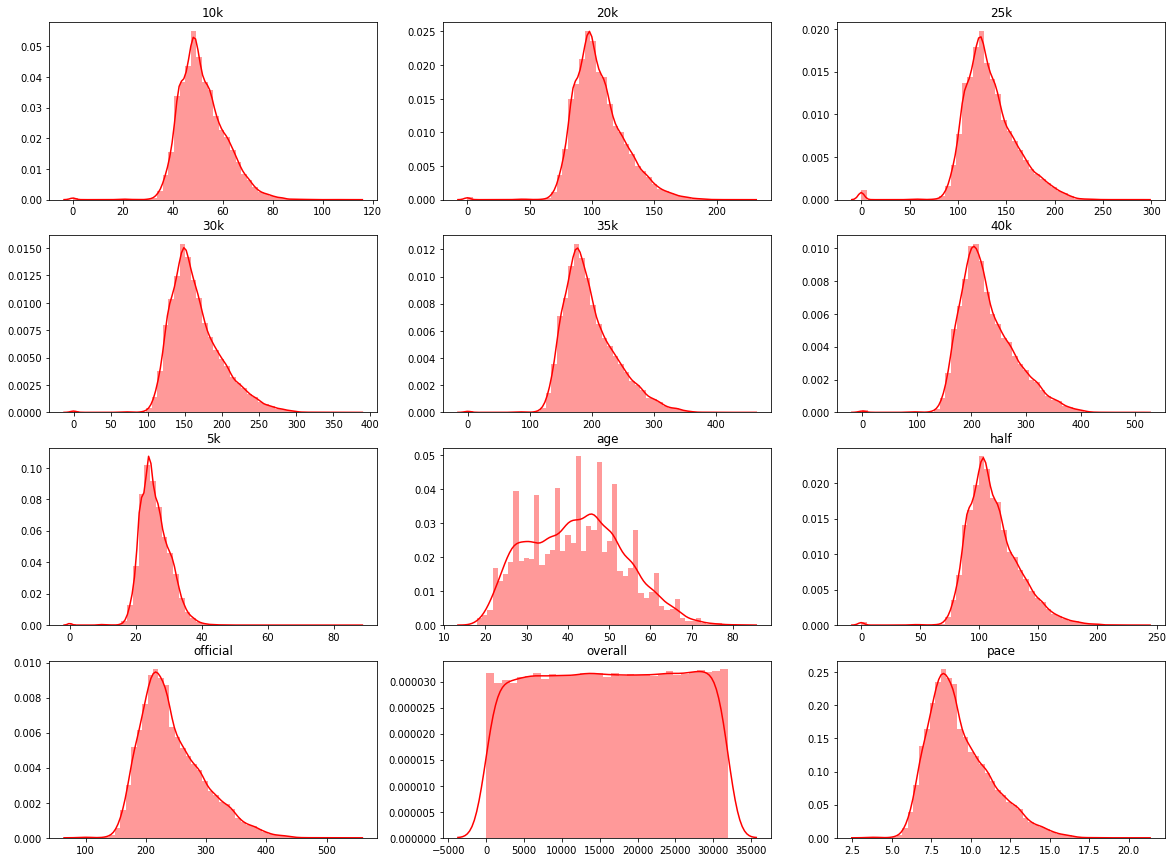

In [208]:
f, axes = plt.subplots(4, 3, figsize=(20,15), sharex=False)
index = 0;
for i in range(4):
    for j in range(3):
        if index < 12:
            sns.distplot(numeric_features.values[:,index], hist=True, color="red", ax=axes[i,j]).set_title(numeric_features.columns[index])
            index = index+1

Most of the columns follow a skewed normal distribution. The distribution of age looks similar to a normal distribution but with very harsh spikes in between.

# Training and applying model

In [209]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(numeric_features)

In [210]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

Scaling the numeric features and fitting it to a KMeans model.

In [211]:
kmeans.fit(features_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [212]:
kmeans.inertia_

104774.3533467112

In [213]:
kmeans.cluster_centers_

array([[-0.85368401, -0.84683343, -0.77520666, -0.84694403, -0.8511531 ,
        -0.84767784, -0.84917123, -0.2911227 , -0.84197187, -0.86120129,
        -0.99573353, -0.86196008],
       [ 1.47286124,  1.53009106,  1.33643632,  1.58321312,  1.58872269,
         1.5471575 ,  1.42676648,  0.00340774,  1.52801155,  1.5810137 ,
         1.37302304,  1.58179063],
       [ 0.17269174,  0.13684155,  0.15732963,  0.11044443,  0.11217052,
         0.12922118,  0.1908999 ,  0.30788968,  0.13270953,  0.12670391,
         0.37358453,  0.12712305]])

In [214]:
df['labels'] = kmeans.labels_

In [215]:
df

,10k,20k,25k,30k,35k,40k,5k,age,bib,city,...,division,gender,genderdiv,half,name,official,overall,pace,state,labels
9,30.48,61.78,77.68,94.78,112.27,129.83,15.15,31,6,Redding,...,20,M,20,65.23,"Hall, Ryan",137.83,20.0,5.27,CA,0
14,17.12,38.02,48.88,60.82,72.83,82.38,8.02,29,W8,Port Elgin,...,13,M,13,40.20,"Cassidy, Josh R.",87.40,13.0,3.35,ON,0
15,33.93,67.92,85.03,102.40,119.68,136.47,16.92,30,F8,Rochester Hills,...,10,F,10,71.68,"Linden, Desiree",143.90,46.0,5.50,MI,0
24,18.30,39.63,50.33,62.33,74.95,84.48,8.67,47,W13,St-Jean Baptiste,...,14,M,14,41.80,"Filteau, Michel",89.40,14.0,3.42,QC,0
27,18.78,39.65,50.33,62.72,75.02,84.75,8.98,30,W14,Champaign,...,15,M,15,41.82,"Kim, Gyu Dae",89.52,15.0,3.42,IL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31979,50.72,99.55,124.02,148.65,174.90,200.22,26.13,32,35908,Larkspur,...,3414,M,7500,104.78,"Anderson, Steve K.",211.75,9849.0,8.08,CA,0
31980,61.28,128.37,165.02,203.43,244.70,285.47,31.07,34,35909,Norwell,...,5212,M,15459,135.85,"McCarthy, Michael P.",302.52,27456.0,11.55,MA,1
31981,59.00,123.33,157.02,192.65,229.62,266.30,28.18,21,35910,West Simsbury,...,5231,F,10788,130.57,"Brimmer, Delia C.",282.00,25092.0,10.77,CT,2
31982,63.75,129.90,167.82,207.52,247.18,285.87,30.98,38,35911,North Andover,...,5800,F,12009,137.03,"Morganthal, Amy",302.73,27476.0,11.55,MA,1


In [216]:
df_grouped = df.groupby(by=['gender', 'labels']).count()

Grouping the labelled data by gender.

In [217]:
df_grouped

10k   20k   25k   30k   35k   40k    5k   age   bib  city  \
gender labels                                                               
F      0       3943  3943  3943  3943  3943  3943  3943  3943  3943  3943   
       1       3208  3208  3208  3208  3208  3208  3208  3208  3208  3208   
       2       6566  6566  6566  6566  6566  6566  6566  6566  6566  6566   
M      0       8244  8244  8244  8244  8244  8244  8244  8244  8244  8244   
       1       2528  2528  2528  2528  2528  2528  2528  2528  2528  2528   
       2       4919  4919  4919  4919  4919  4919  4919  4919  4919  4919   

               country  division  genderdiv  half  name  official  overall  \
gender labels                                                                
F      0          3943      3943       3943  3943  3943      3943     3943   
       1          3208      3208       3208  3208  3208      3208     3208   
       2          6566      6566       6566  6566  6566      6566     6566   
M      0          8244      8244       8244  8244  8244      8244     8244   
       1          2528      2528       2528  2528  2528      2528     2528   
       2          4919      4919       4919  4919  4919      4919     4919   

               pace  state  
gender labels               
F      0       3943   3943  
       1       3208   3208  
       2       6566   6566  
M      0       8244   8244  
       1       2528   2528  
       2       4919   4919

[Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2')]

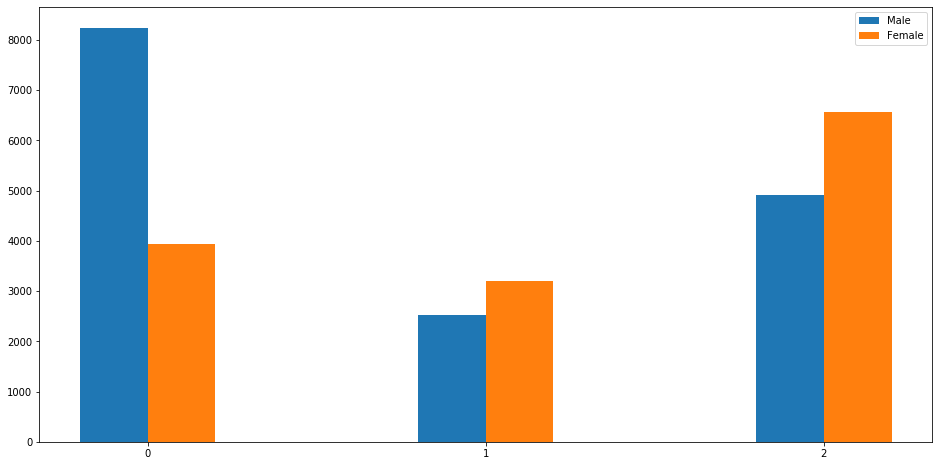

In [218]:
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(df.labels.unique()))
bar_width = 0.2
b1 = ax.bar(x, df_grouped['10k']['M'],
            width=bar_width, label='Male')
b2 = ax.bar(x + bar_width, df_grouped['10k']['F'],
            width=bar_width, label='Female')

ax.set_xticks(x + bar_width/2)
ax.legend()
sorted_labels = sorted(df.labels.unique())
ax.set_xticklabels(sorted_labels)

Group 0 possesses a very large portion of males while the other two groups consists of more females.

In [219]:
df['age'].describe()

count    29408.000000
mean        42.075116
std         11.359969
min         18.000000
25%         33.000000
50%         42.000000
75%         50.000000
max         81.000000
Name: age, dtype: float64

In [220]:
df['age-group'] = pd.cut(df['age'], bins=[18,25,40,70,81], labels=['18-25', '26-40', '40-70', '> 70'])

In [221]:
df_grouped = df.groupby(['age-group', 'labels']).count()

[Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2')]

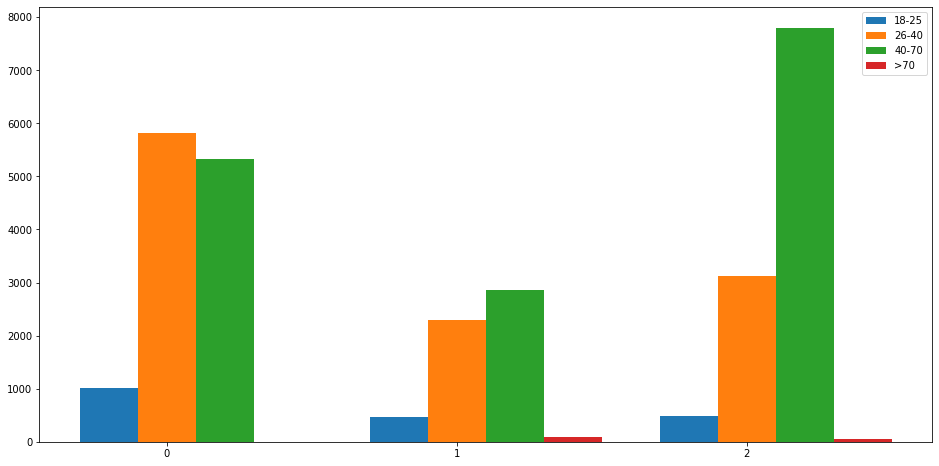

In [222]:
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(df.labels.unique()))
bar_width = 0.2
b1 = ax.bar(x, df_grouped['10k']['18-25'],
            width=bar_width, label='18-25')
b2 = ax.bar(x + bar_width, df_grouped['10k']['26-40'],
            width=bar_width, label='26-40')
b3 = ax.bar(x + 2*bar_width, df_grouped['10k']['40-70'],
            width=bar_width, label='40-70')
b4 = ax.bar(x + 3*bar_width, df_grouped['10k']['> 70'],
            width=bar_width, label='>70')

ax.set_xticks(x + bar_width)
ax.legend()
ax.set_xticklabels(sorted_labels)

From this chart and the gender-based chart, it can be said that:
- Most of group 0's population is in the 26-40 and 40-70 age group. This means that group 0 has mostly males in these age groups
- Groups 1 and 2 are also largely dominated by the 26-40 and 40-70 age groups. Group 2 seems to have a large portion of females in the 40-70 age group.

In [223]:
df['official'].describe()

count    29408.000000
mean       243.867369
std         52.385368
min         84.820000
25%        206.230000
50%        233.100000
75%        274.470000
max        538.880000
Name: official, dtype: float64

In [224]:
df['time-group'] = pd.cut(df['official'], bins=[0,200,250,275,540], labels=['< 200', '200-250', '250-270', '> 275'])

In [225]:
df_grouped = df.groupby(['time-group', 'labels']).count()

[Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2')]

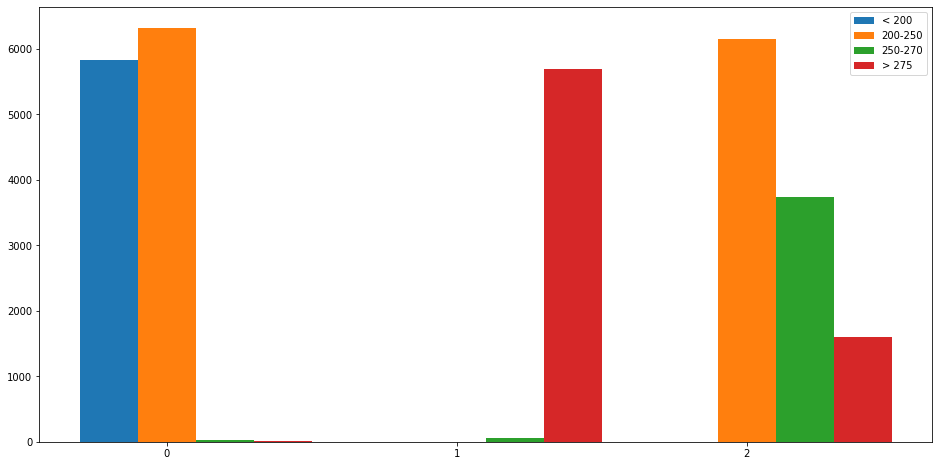

In [226]:
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(df.labels.unique()))
bar_width = 0.2
b1 = ax.bar(x, df_grouped['10k']['< 200'],
            width=bar_width, label='< 200')
b2 = ax.bar(x + bar_width, df_grouped['10k']['200-250'],
            width=bar_width, label='200-250')
b3 = ax.bar(x + 2*bar_width, df_grouped['10k']['250-270'],
            width=bar_width, label='250-270')
b4 = ax.bar(x + 3*bar_width, df_grouped['10k']['> 275'],
            width=bar_width, label='> 275')

ax.set_xticks(x + bar_width)
ax.legend()
ax.set_xticklabels(sorted_labels)

Given that:
- Group 0 has a lot of males in the 26-40 and 40-70 age groups
- Groups 1 and 2 has more females than males

Some notable points can be linked:
- Group 0's finishing times are a lot shorter than the other two groups.
- Group 1 mostly took more than 275 minutes
- Group 2, with more females, take a lot longer to finish (200 minutes or above)